In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def calculate_SVD(A):
    # Tính SVD của ma trận A
    U, s, Vt = svd(A)
    
    # Tạo ma trận Σ từ vector s
    k = len(s)
    k_zeros_matrix = np.zeros((k, k))
    np.fill_diagonal(k_zeros_matrix, s)
    Sigma = np.zeros((A.shape[0], A.shape[1]))
    Sigma[:k, :k] = k_zeros_matrix

    return U, Vt, Sigma, s

def get_SVD_by_k(U, Vt, Sigma, k):
    # Giữ lại k dòng và k cột đầu tiên của ma trận Σ để tạo thành Σk
    Sigma_k = Sigma[:k, :k]

    # Giữ lại k cột đầu tiên của ma trận U để tạo ra Uk
    U_k = U[:, :k]
    
    # Giữ lại k hàng đầu tiên của ma trận V chuyển vị để tạo ra VkT
    V_kT = Vt[:k, :]

    return U_k, V_kT, Sigma_k

def calculate_truncated_SVD(A, k):
    U, Vt, Sigma, s = calculate_SVD(A)
    U_k, V_kT, Sigma_k = get_SVD_by_k(U, Vt, Sigma, k)

    # Tính phần trăm lượng thông tin được giữ lại
    total_information = np.sum(s**2)
    retained_information = np.sum(s[:k]**2)
    retained_percentage = (retained_information / total_information) * 100

    A_reconstructed = np.dot(U_k, np.dot(Sigma_k, V_kT))
    
    return A_reconstructed, retained_percentage

Ảnh gốc:


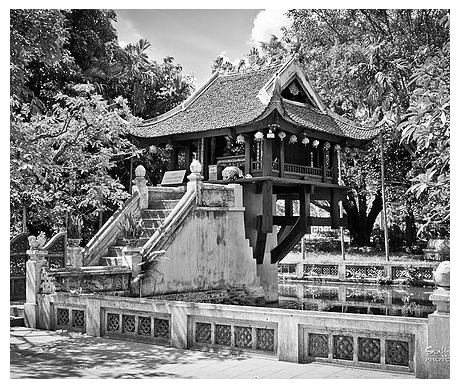

k = 50:
Phần trăm lượng thông tin giữ lại: 93.71%


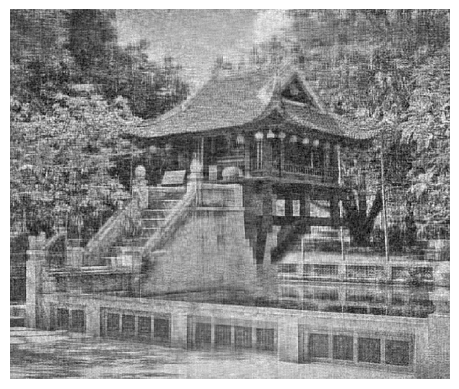

k = 100:
Phần trăm lượng thông tin giữ lại: 96.89%


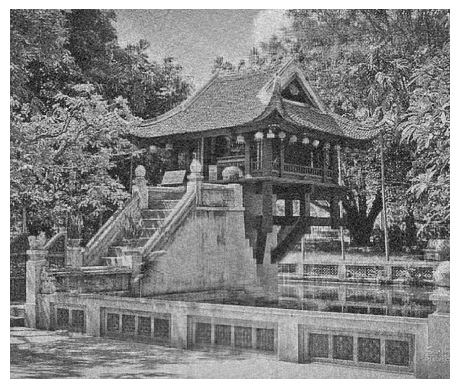

k = 250:
Phần trăm lượng thông tin giữ lại: 99.78%


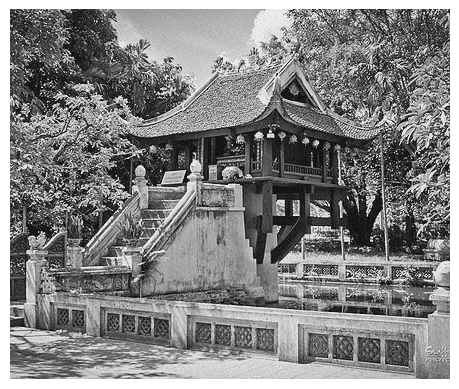

k = 300:
Phần trăm lượng thông tin giữ lại: 99.95%


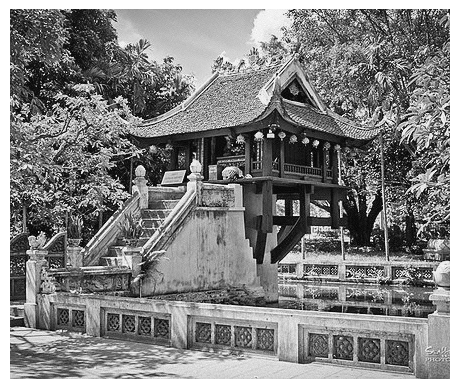

In [3]:
# Bài tập 5 (Ảnh xám):
A = np.array(Image.open('chua-mot-cot.jpg'))
A = A.dot([0.299, 0.5870, 0.114])
print("Ảnh gốc:")
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()
for k in [50, 100, 250, 300]:
    A_reconstructed, retained_percentage = calculate_truncated_SVD(A, k)
    print(f"k = {k}:")
    print(f"Phần trăm lượng thông tin giữ lại: {retained_percentage:.2f}%")
    plt.imshow(A_reconstructed, cmap='gray')
    plt.axis('off')
    plt.show()

Ảnh gốc:


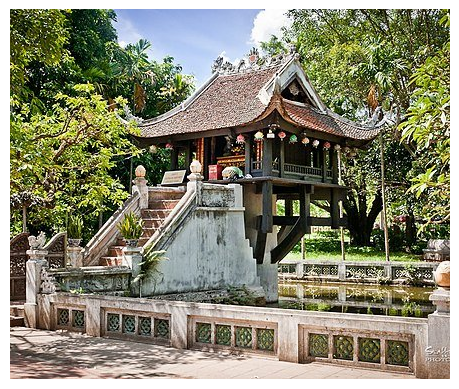

k = 50:
Phần trăm lượng thông tin giữ lại: 93.49%


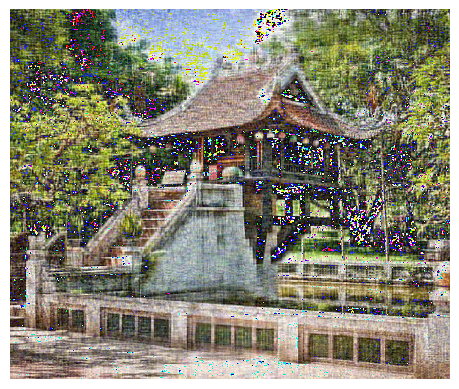

k = 100:
Phần trăm lượng thông tin giữ lại: 96.78%


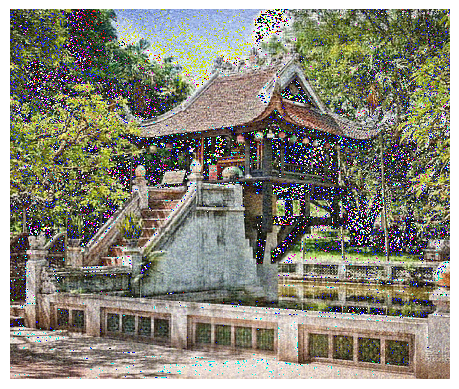

k = 250:
Phần trăm lượng thông tin giữ lại: 99.77%


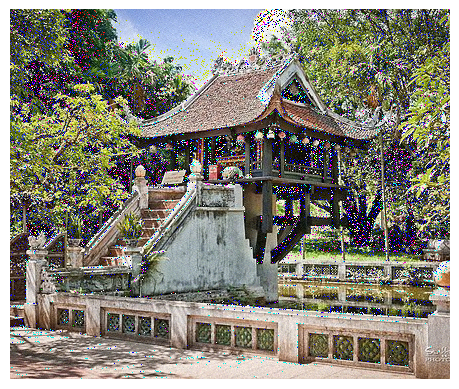

k = 300:
Phần trăm lượng thông tin giữ lại: 99.94%


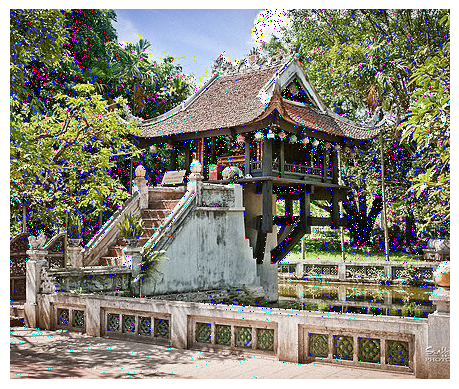

In [4]:
# Bài tập 5 (Ảnh màu):
A = np.array(Image.open('chua-mot-cot.jpg'))
print("Ảnh gốc:")
plt.imshow(A)
plt.axis('off')
plt.show()
red_channel = A[:, :, 0]
green_channel = A[:, :, 1]
blue_channel = A[:, :, 2]
for k in [50, 100, 250, 300]:
    red_reconstructed, red_retained_percentage = calculate_truncated_SVD(red_channel, k)
    green_reconstructed, green_retained_percentage = calculate_truncated_SVD(green_channel, k)
    blue_reconstructed, blue_retained_percentage = calculate_truncated_SVD(blue_channel, k)
    compressed_image = np.stack([red_reconstructed, green_reconstructed, blue_reconstructed], axis=2).astype(np.uint8)
    retained_percentage = (red_retained_percentage + green_retained_percentage + blue_retained_percentage) / 3
    print(f"k = {k}:")
    print(f"Phần trăm lượng thông tin giữ lại: {retained_percentage:.2f}%")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()

In [5]:
# Bài tập 6:
data = np.loadtxt('data.csv', delimiter=' ', usecols=(0, 1, 2))
ones_column = np.ones((data.shape[0], 1))
A = np.column_stack((data, ones_column))
Y = np.loadtxt('data.csv', delimiter=' ', usecols=(3))
ATA = np.dot(A.T, A)
det_ATA = np.linalg.det(ATA)
if det_ATA != 0:
    # Tính X = (A^T A)^-1 A^T Y
    X = np.linalg.inv(ATA) @ A.T @ Y
else:
    U, Vt, Sigma, _ = calculate_SVD(A)
    
    # Tạo ma trận Σ+
    Sigma_plus = np.zeros_like(A.T)
    for i in range(len(Sigma)):
        if Sigma[i] != 0:
            Sigma_plus[i, i] = 1 / Sigma[i]

    # Tính X = V Σ+ U^T Y
    X = Vt.T @ Sigma_plus @ U.T @ Y
omega = np.array([4, 64, 4000, 1])
price = X @ omega
print(f"Giá chiếc điện thoại mới: {price:.0f}")

Giá chiếc điện thoại mới: 4897997
